In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot:xlabel='age', ylabel='charges'>

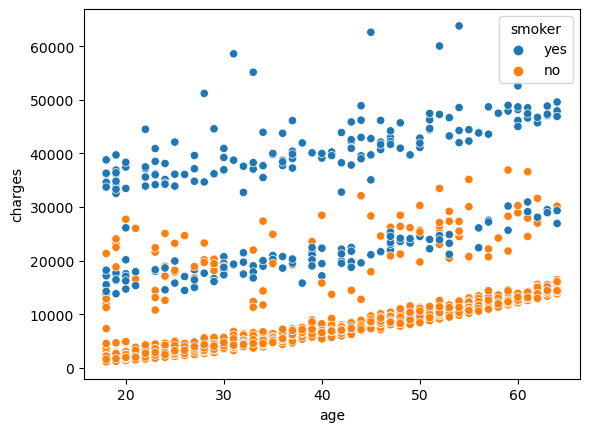

In [21]:
sns.scatterplot(data=df, x="age", y="charges", hue="smoker")

<AxesSubplot:xlabel='bmi', ylabel='charges'>

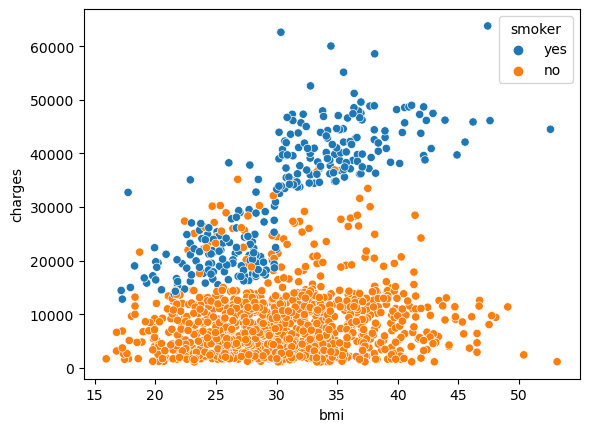

In [27]:
sns.scatterplot(data=df, x="bmi", y="charges", hue="smoker")

<AxesSubplot:xlabel='bmi', ylabel='charges'>

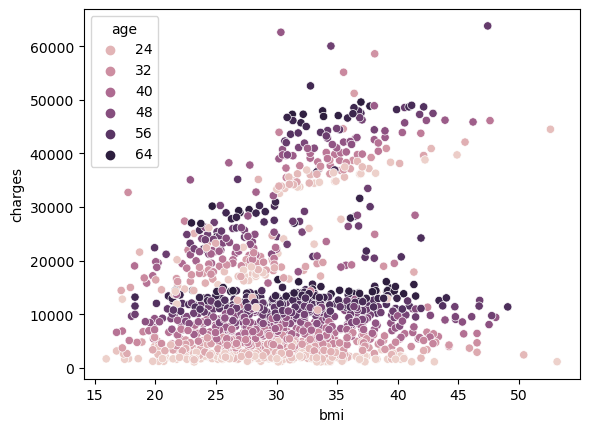

In [28]:
sns.scatterplot(data=df, x="bmi", y="charges", hue="age")

In [ ]:
tdf, pdf = train_test_split(df, test_size = 0.3, )

In [30]:
smokers = tdf[df.smoker == 'yes']

In [31]:
nonSmokers = tdf[df.smoker == 'no']

In [32]:
smokers.corr()

,age,bmi,children,charges
age,1.000000,0.059674,0.081183,0.368224
bmi,0.059674,1.000000,-0.012619,0.806481
children,0.081183,-0.012619,1.000000,0.035945
charges,0.368224,0.806481,0.035945,1.000000


In [33]:
nonSmokers.corr()

,age,bmi,children,charges
age,1.000000,0.122638,0.033395,0.627947
bmi,0.122638,1.000000,0.019208,0.084037
children,0.033395,0.019208,1.000000,0.138929
charges,0.627947,0.084037,0.138929,1.000000


In [38]:
def trainModel(df, x, y):
    slopes = []
    for i in range(len(df)):
        slope = (df.iloc[i]["charges"] - y) / (df.iloc[i]["bmi"] - x) #(y2-y1)/(x2-x1)
        slopes.append(slope)
        
    return sum(slopes)/len(slopes)
b = 10000
m = trainModel(smokers, 0, b)
print("y = " + str(m) + "x + " + str(b))

y = 683.4843782174564x + 10000


In [40]:
def testModel(df, m, b):
    checks = []
    for i in range(len(df)):
        predicted = (m*df.iloc[i]["bmi"] + b)
        actual = df.iloc[i]["charges"]
        difference = abs(predicted - actual)
        if difference <= 1000:
            checks.append[1]
        else:
            checks.append[0]
            
    return checks